**AUTHOR:**  

Nabiel Husein Shihab / nabielshihab@hotmail.com

**NOTEBOOK DESCRIPTION**

This notebook will show us how to perform **Artificial Neural Network (ANN)** using **Keras & Tensorflow**, including data preprocessing (encoding categorical variables, train-test splitting & feature scaling), ANN model training, predicting new dataset & evaluating the model. 

**REFERENCES:** 
> - Chollet, F. (2018): Deep learning with Python, Manning Publication
> - https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications

# Brief Description About K-means Clustering

## Why do we use deep Learning? What is Deep Learning?

Deep Learning does not require a clear understanding of the mechanism, the output only depends on the weight of the connection between the input and output systems, the value of which can be obtained from studying the training data. This method is very effective in solving fuzzy problems that have certain laws, but the mechanism is not clear. Deep learning is one part of machine learning (supervised learning model). The "Deep" in deep learning does not refer to any deeper understanding achieved by this approach, it actually refers to successive layers. How many layers contribute to the data model is called the depth of the model. In deep learning, these layers will be called through a model called a neural network. neural network refers to neurobiology, but although some of the central concepts in deep learning were developed in part by drawing inspiration from our understanding of the brain, there is no evidence that the brain implements anything like the learning mechanisms used in deep learning models. There are several methods included in deep learning, one of which is artificial neural networks (ANN).

## How Does ANN Work?

The information from the dataset will be entered into the network via the input neurons, which triggers the hidden neuron layers, and this will arrive at the output neurons. 

<img src="Figures/ANN_3.png" width="700"/>

Not all neurons are "triggered" all the time. Each neuron receives input from the left neuron, and the input is multiplied by the weight of the connection it passes through. Each neuron adds up all the inputs it receives and if the sum is more than a certain threshold value, the neuron is “triggered” and triggers the neuron it is connected to (the neuron to the right of it).

## How Does ANN "Learn"?

Chollet (2018) states that the training of the ANN model revolves around the following objects:
1. Layers, which are combined into a network or model,
2. Appropriate input and target data,
3. Loss function, the quantity that will be minimized during the model learning process takes place,
4. Optimizer, determines how the model will be updated based on the loss function. Optimizer implements specific variant of stochastic gradient descent (SGD)

<img src="Figures/ANN_4.png" width="400"/>  

The image above illustrates the relationship between the four objects. The model, which consists of several layers connected to each other, maps the input data into predictions. Then the loss function will compare the prediction with the target, resulting in a loss value, a measure of how well the model prediction matches what is expected. The optimizer uses the loss value to update the weights in the model.

# **TENSORFLOW & KERAS**

<img src="Figures/tensor_flow.png" width="500"/> <img src="Figures/keras.png" width="400"/>

we can use deep learning framework to make it easier to solve problems using deep learning. `TensorFlow is one of the frameworks for deep learning. While Keras is a library in Python that can work on the TensorFlow framework`. In simple terms Keras is the "wrapper" of TensorFlow. Keras is there to make it easier for us because Keras can be said to be more high-level than TensorFlow. Actually there are other frameworks that can use Keras, including Theano and CNTK. Keras was created with a focus on understanding deep learning techniques, such as creating layers for neural networks to retain concepts of shapes and mathematical details.

To create a deep learning model in Keras, we can use the steps below:
> 1. Load our dataset (*features & labels*)
> 2. Preprocess the dataset
> 3. Create and train ANN models
> 4. Make predictions and evaluate the ANN model

# Explanation about The Data

For the current exercise, we will analyze customer data for a bank. Over a period of 6 months, the bank observes whether its customers leave the bank or remain. Our goal is to create an ANN that can predict, based on the geo-demographic and transactional information provided, if an individual customer will leave the bank or remain. 

# Let's code

## Import Packages/Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense

## Load dataset 

In [2]:
dataset = pd.read_csv('catalogs\\Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# drop unrelevant columns
dataset = dataset.drop(['RowNumber', "CustomerId", "Surname"], axis=1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Preprocess dataset

In this step, we will:
> a. Encode categorical variables  
> b. Split dataset into train set and test set  
> c. Rescale our feature  

### Encoding categorigal variables
in our dataset, there are two attributes that are categorical variables, namely Geography and Gender.

In [4]:
# label encoding for Gender
labelencoder_X = LabelEncoder()
dataset['Gender'] = labelencoder_X.fit_transform(dataset['Gender'])

# one hot encoding for Geography
onehotencoder = OneHotEncoder()

# creating dummy variables for Geography.
# Reshape 1-D Geography array to 2-D because fit_transform asks 2-D 
dummy_geography = onehotencoder.fit_transform(dataset["Geography"].values.reshape(-1, 1)).toarray()

# combining dummy variables and our dataset 
dfOneHot = pd.DataFrame(dummy_geography, columns=["Geography_"+str(int(i)) for i in range(dummy_geography.shape[1])])
dataset = pd.concat([dfOneHot, dataset], axis=1)

# remove unencoded (original) Geography
dataset = dataset.drop(['Geography'], axis=1)

# remove one of the dummy variables to avoid multicollinearity issue
dataset = dataset.drop(['Geography_0'], axis=1)

### Train-Test Splitting
Train set will be used to train our ANN model, while test set will be used to evaluate the model.

In [5]:
# get features and labels
X = dataset.iloc[:, 0:11].values
y = dataset.iloc[:, 11].values

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature scaling
we will use standradization to rescale features, it means to substract our features with their own mean and divided by standard deviation.

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Create and Train ANN

After we preprocess our dataset, now it's time to build our ANN model. This time, We will have 4 layers, namely: 
> a. **input layer**, consists of 11 unput units (num of features)  
> b. **first hidden layer**, it has 6 hidden units with Relu activation function  
> c. **second hidden layer kedua**, it has 6 hidden units with Relu activation function  
> d. **output layer**, it has 1 output unit with Sigmoid activation function  


<img src="Figures/ANN_arsitektur.png" width="800"/>


the characteristics of our model:
> a. There is a direct relationship between adjacent layers  
> b. There is no direct relationship between nonadjacent layers  
> c. There is no relationship between units in the same layer  
> d. Using **binary crossentropy loss function** to calculate the loss score between the predicted label and the observed label during the training process  
> e. Using **Adam optimizer** (one of the SGD methods) to update the weights  
> f. Using batch size = 32 & epoch = 100  

In [7]:
# initiate ANN
classifier = Sequential()

# forming the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim = 11))

# adding second hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# adding output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train ANN model using train set
classifier.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5963 - accuracy: 0.7947
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.7960
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4129 - accuracy: 0.7960
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.7960
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.7960
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8215
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8270
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3897 - accura

## Make Predictions and Evaluate Our ANN Model

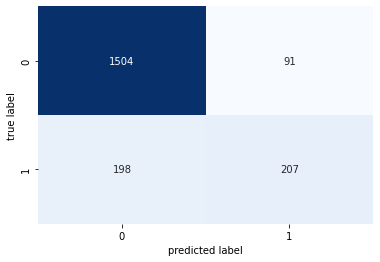

In [8]:
# making predictions using test set
y_pred = classifier.predict(X_test)

# setting threshold / cut off to transform probability values into binary values
y_pred = (y_pred > 0.5)

# making confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ['0', '1']

# visualize confusion matrix
ax = sns.heatmap(cm, cmap="Blues", annot=True, fmt=".0f", xticklabels=classes, yticklabels=classes, cbar=False)
ax.set(xlabel="predicted label", ylabel="true label")
plt.show()

In [9]:
# calculate model performance using accuracy
tn, fp, fn, tp = cm.ravel()
correct_pred = tp + tn
wrong_pred = fp + fn
pred_accuracy = correct_pred / (correct_pred + wrong_pred)

print('model accuracy:', pred_accuracy)

model accuracy: 0.8555


As we can see, our simple ANN model has accuracy of 0.86. It means we have a good model when it comes to predict a new dataset. However we can increase the performance by tuning up the hyperparameters using GridSearchCV, choosing different ANN architecture, applying regularization, etc. There is still a big room for improvement! Unfortunately we will not cover how to do those things in this notebook...